In [21]:
import json
import re
import os
import matplotlib.pyplot as plt
from datetime import datetime
from collections import defaultdict

keywords = [
    "covid-19", "infection", "flu", "sars", "Covid-19", 
    "pandemic", "coronavirus", "covid19", "SARS-CoV-2", "coronavirus disease", 
    "outbreak", "novel coronavirus", "symptoms", "cough", "fever", 
    "pneumonia", "respiratory", "shortness of breath", "loss of taste", 
    "loss of smell", "quarantine", "isolation", "vaccine", "vaccination", 
    "antiviral", "immunity", "Pfizer", "Moderna", "AstraZeneca", 
    "Johnson & Johnson", "booster", "MERS", "H1N1", "avian flu", 
    "swine flu", "epidemic"
]

pattern = re.compile(r'\b(' + '|'.join(keywords) + r')\b', re.IGNORECASE)

# Directory containing the JSON files
folder_path = "CS685_Data"

# Function to extract year and month from filename (assuming format 'twitter_stream_YYYY_MM_DD_filtered.json')
def extract_year_month_from_filename(filename):
    # Match the date part in the filename (e.g., '2020_01_01')
    date_match = re.match(r'twitter[_-]stream[_-](\d{4})[_-](\d{2})[_-](\d{2})[_-]filtered.json', filename)
    if date_match:
        year, month, _ = map(int, date_match.groups())
        return (year, month)
    return None

# Initialize dictionaries to accumulate data by month
monthly_counts = defaultdict(int)
monthly_mentions = defaultdict(int)
monthly_normalized = defaultdict(float)
monthly_files = defaultdict(list)

# Loop through all files in the folder and process them
for filename in sorted(os.listdir(folder_path)):
    if filename.endswith(".json"):
        year_month = extract_year_month_from_filename(filename)
        if year_month:
            year, month = year_month
            file_path = os.path.join(folder_path, filename)
            covid_mentions_count = 0
            total_tweets_count = 0

            # Open and read through the JSON file
            with open(file_path, "r") as file:
                for line in file:
                    try:
                        # Load each line as JSON
                        data = json.loads(line)

                        # Check for "output" and "ParseCount" field
                        if 'output' in data:
                            parse_count = data['output'].get('ParseCount', 0)
                            total_tweets_count += parse_count

                            # Check if there are any "Objects" to parse for tweet text
                            if 'Objects' in data['output']:
                                for obj in data['output']['Objects']:
                                    tweet_text = obj.get("text", "")
                                    
                                    # Check for the keywords in the tweet text
                                    if pattern.search(tweet_text):
                                        covid_mentions_count += 1

                    except json.JSONDecodeError:
                        # Handle any potential JSON decoding errors
                        print(f"Error decoding JSON in file {filename}")

            # Accumulate counts for each month
            monthly_counts[(year, month)] += total_tweets_count
            monthly_mentions[(year, month)] += covid_mentions_count
            monthly_files[(year, month)].append(filename)

# Calculate normalized mentions for each month
for month in monthly_mentions:
    total_mentions = monthly_mentions[month]
    total_tweets = monthly_counts[month]
    if total_tweets > 0:
        monthly_normalized[month] = total_mentions / total_tweets
    else:
        monthly_normalized[month] = 0
# Prepare data for plotting
months = sorted(monthly_counts.keys())
counts = [monthly_counts[month] for month in months]
mentions = [monthly_mentions[month] for month in months]
normalized_mentions = [monthly_normalized[month] for month in months]
month_labels = [f"{year}-{month:02d}" for year, month in months]



C:\Users\20lid\AppData\Local\Temp\ipykernel_22524\2942365324.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(month_labels, rotation=90)
C:\Users\20lid\AppData\Local\Temp\ipykernel_22524\2942365324.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(month_labels, rotation=90)


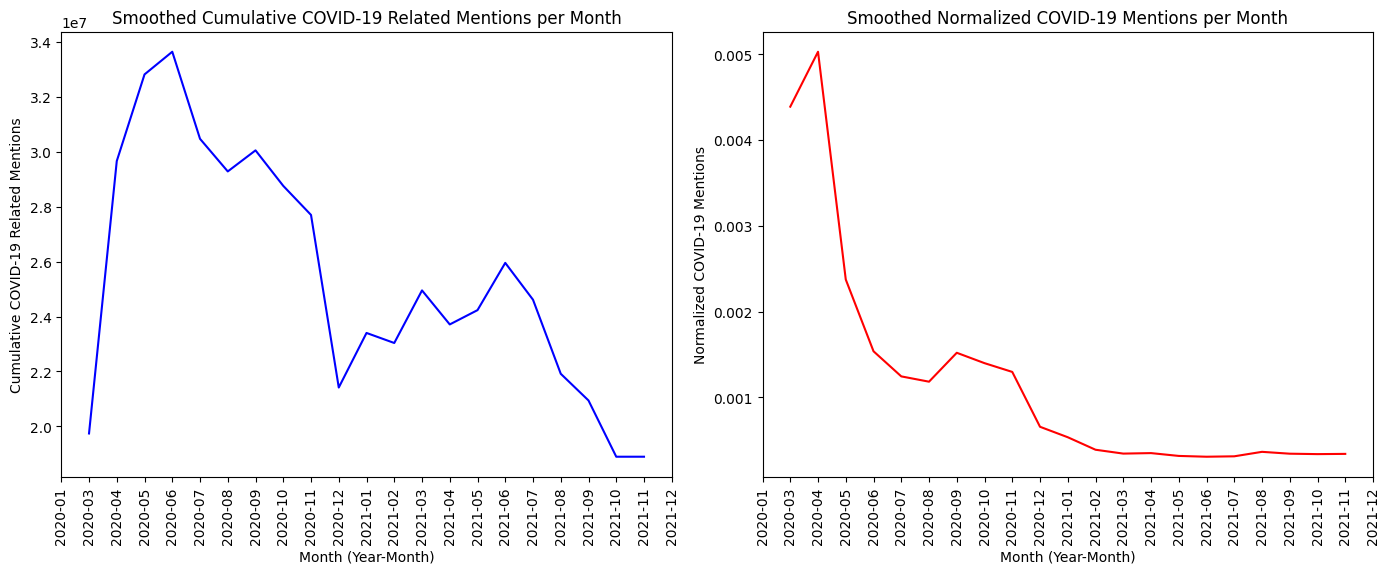

In [28]:



# Plotting the monthly accumulated counts and normalized counts
import pandas as pd

# Convert your data to a Pandas Series for easier manipulation
counts_series = pd.Series(counts)
normalized_series = pd.Series(normalized_mentions)

# Apply a rolling average with a window size (adjust the window for more or less smoothing)
window_size = 3
smoothed_counts = counts_series.rolling(window=window_size, center=True).mean()
smoothed_normalized_mentions = normalized_series.rolling(window=window_size, center=True).mean()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plot the smoothed cumulative raw counts by month (ax1)
ax1.plot(month_labels, smoothed_counts, color='b', linestyle='-')  # Removed marker
ax1.set_xticklabels(month_labels, rotation=90)
ax1.set_xlabel('Month (Year-Month)')
ax1.set_ylabel('Cumulative COVID-19 Related Mentions')
ax1.set_title('Smoothed Cumulative COVID-19 Related Mentions per Month')

# Plot the smoothed normalized counts by month (ax2)
ax2.plot(month_labels, smoothed_normalized_mentions, color='r', linestyle='-')  # Removed marker
ax2.set_xticklabels(month_labels, rotation=90)
ax2.set_xlabel('Month (Year-Month)')
ax2.set_ylabel('Normalized COVID-19 Mentions')
ax2.set_title('Smoothed Normalized COVID-19 Mentions per Month')

# Adjust layout and show plot
plt.tight_layout()
plt.show()




C:\Users\20lid\AppData\Local\Temp\ipykernel_22524\2596128582.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(month_labels, rotation=90)
C:\Users\20lid\AppData\Local\Temp\ipykernel_22524\2596128582.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(month_labels, rotation=90)


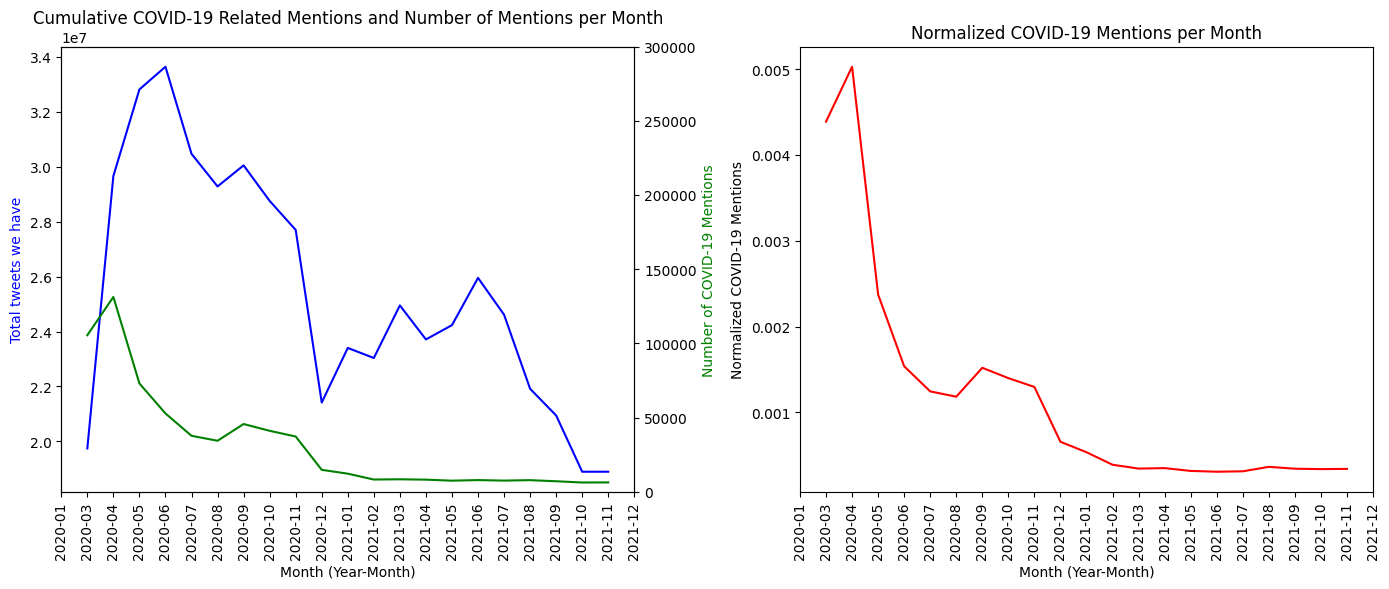

In [29]:
# Plotting the monthly accumulated counts and normalized counts
import pandas as pd

# Convert data to Pandas Series for easier manipulation
counts_series = pd.Series(counts)
mentions_series = pd.Series(mentions)
normalized_series = pd.Series(normalized_mentions)

# Apply a rolling average for smoothing
window_size = 3  # Adjust the window size for more or less smoothing
smoothed_counts = counts_series.rolling(window=window_size, center=True).mean()
smoothed_mentions = mentions_series.rolling(window=window_size, center=True).mean()
smoothed_normalized_mentions = normalized_series.rolling(window=window_size, center=True).mean()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plot the cumulative raw counts by month (ax1)
ax1.plot(month_labels, smoothed_counts, color='b', linestyle='-', label="Total Tweets Count")  # Smooth line
ax1.set_xticklabels(month_labels, rotation=90)
ax1.set_xlabel('Month (Year-Month)')
ax1.set_ylabel('Total tweets we have', color='b')
ax1.set_title('Cumulative COVID-19 Related Mentions and Number of Mentions per Month')

# Create a second y-axis to plot the number of mentions
ax3 = ax1.twinx()
ax3.plot(month_labels, smoothed_mentions, color='g', linestyle='-', label="COVID-19 Mentions")  # Smooth line
ax3.set_ylabel('Number of COVID-19 Mentions', color='g')
ax3.set_ylim([0, 300000])

# Plot the normalized counts by month (ax2)
ax2.plot(month_labels, smoothed_normalized_mentions, color='r', linestyle='-', label="Normalized Mentions")  # Smooth line
ax2.set_xticklabels(month_labels, rotation=90)
ax2.set_xlabel('Month (Year-Month)')
ax2.set_ylabel('Normalized COVID-19 Mentions')
ax2.set_title('Normalized COVID-19 Mentions per Month')

# Adjust layout to avoid overlap
fig.tight_layout()

# Show the plot
plt.show()



In [1]:
import json
import re
import os
import matplotlib.pyplot as plt
from datetime import datetime
from collections import defaultdict

malaria_keywords = [
    "malaria",
    "plasmodium",
    "mosquito-borne disease",
    "chills",
    "anopheles mosquito",
    "antimalarial",
    "artemisinin",
    "quinine",
    "chloroquine",
    "parasite infection",
    "mosquito control",
    "bed nets",
    "insecticide-treated nets",
    "gametocytes",
]


pattern = re.compile(r'\b(' + '|'.join(malaria_keywords) + r')\b', re.IGNORECASE)


# Directory containing the JSON files
folder_path = "CS685_Data"

# Function to extract year and month from filename (assuming format 'twitter_stream_YYYY_MM_DD_filtered.json')
def extract_year_month_from_filename(filename):
    # Match the date part in the filename (e.g., '2020_01_01')
    date_match = re.match(r'twitter[_-]stream[_-](\d{4})[_-](\d{2})[_-](\d{2})[_-]filtered.json', filename)
    if date_match:
        year, month, _ = map(int, date_match.groups())
        return (year, month)
    return None

# Initialize dictionaries to accumulate data by month
monthly_counts = defaultdict(int)
monthly_mentions = defaultdict(int)
monthly_normalized = defaultdict(float)
monthly_files = defaultdict(list)

# Loop through all files in the folder and process them
for filename in sorted(os.listdir(folder_path)):
    if filename.endswith(".json"):
        year_month = extract_year_month_from_filename(filename)
        if year_month:
            year, month = year_month
            file_path = os.path.join(folder_path, filename)
            covid_mentions_count = 0
            total_tweets_count = 0

            # Open and read through the JSON file
            with open(file_path, "r") as file:
                for line in file:
                    try:
                        # Load each line as JSON
                        data = json.loads(line)

                        # Check for "output" and "ParseCount" field
                        if 'output' in data:
                            parse_count = data['output'].get('ParseCount', 0)
                            total_tweets_count += parse_count

                            # Check if there are any "Objects" to parse for tweet text
                            if 'Objects' in data['output']:
                                for obj in data['output']['Objects']:
                                    tweet_text = obj.get("text", "")
                                    
                                    # Check for the keywords in the tweet text
                                    if pattern.search(tweet_text):
                                        covid_mentions_count += 1

                    except json.JSONDecodeError:
                        # Handle any potential JSON decoding errors
                        print(f"Error decoding JSON in file {filename}")

            # Accumulate counts for each month
            monthly_counts[(year, month)] += total_tweets_count
            monthly_mentions[(year, month)] += covid_mentions_count
            monthly_files[(year, month)].append(filename)

# Calculate normalized mentions for each month
for month in monthly_mentions:
    total_mentions = monthly_mentions[month]
    total_tweets = monthly_counts[month]
    if total_tweets > 0:
        monthly_normalized[month] = total_mentions / total_tweets
    else:
        monthly_normalized[month] = 0
# Prepare data for plotting
months = sorted(monthly_counts.keys())
counts = [monthly_mentions[month] for month in months]
mentions = [monthly_mentions[month] for month in months]
normalized_mentions = [monthly_normalized[month] for month in months]
month_labels = [f"{year}-{month:02d}" for year, month in months]



C:\Users\20lid\AppData\Local\Temp\ipykernel_12292\2026699988.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(month_labels, rotation=90)
C:\Users\20lid\AppData\Local\Temp\ipykernel_12292\2026699988.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(month_labels, rotation=90)


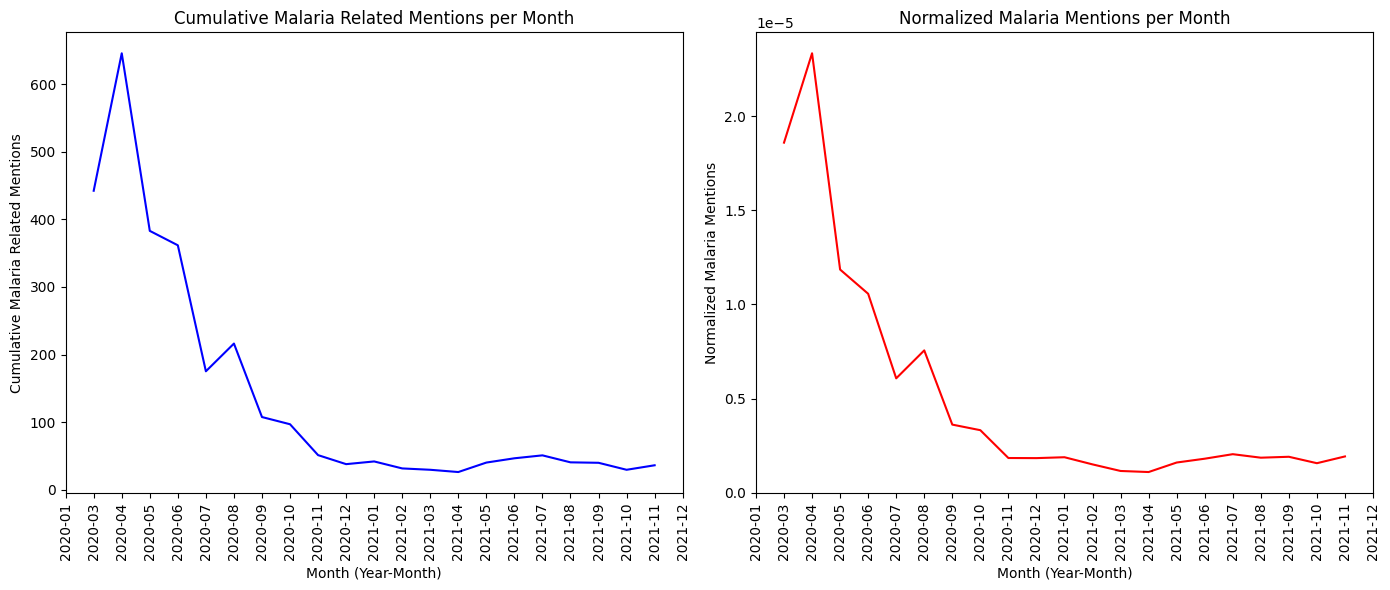

In [2]:
import pandas as pd

# Convert data to Pandas Series for smoothing
counts_series = pd.Series(counts)
normalized_series = pd.Series(normalized_mentions)

# Apply a rolling average with a window size for smoothing
window_size = 3  # Adjust as needed for smoother curves
smoothed_counts = counts_series.rolling(window=window_size, center=True).mean()
smoothed_normalized_mentions = normalized_series.rolling(window=window_size, center=True).mean()

# Plotting the monthly accumulated counts and normalized counts
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plot the smoothed cumulative raw counts by month (ax1)
ax1.plot(month_labels, smoothed_counts, color='b', linestyle='-')  # Removed marker
ax1.set_xticklabels(month_labels, rotation=90)
ax1.set_xlabel('Month (Year-Month)')
ax1.set_ylabel('Cumulative Malaria Related Mentions')
ax1.set_title('Cumulative Malaria Related Mentions per Month')

# Plot the smoothed normalized counts by month (ax2)
ax2.plot(month_labels, smoothed_normalized_mentions, color='r', linestyle='-')  # Removed marker
ax2.set_xticklabels(month_labels, rotation=90)
ax2.set_xlabel('Month (Year-Month)')
ax2.set_ylabel('Normalized Malaria Mentions')
ax2.set_title('Normalized Malaria Mentions per Month')

# Adjust layout and show plot
plt.tight_layout()
plt.show()


In [3]:
import json
import re
import os
import matplotlib.pyplot as plt
from datetime import datetime
from collections import defaultdict

dengue_keywords = [
    "dengue", "breakbone fever", "aedes aegypti", 
    "arbovirus", "flavivirus", 
     "viral hemorrhagic fever", 
    "mosquito breeding", "aedes albopictus", 
    "dengvaxia", 
    "dengue outbreak"
]



pattern = re.compile(r'\b(' + '|'.join(dengue_keywords) + r')\b', re.IGNORECASE)


# Directory containing the JSON files
folder_path = "CS685_Data"

# Function to extract year and month from filename (assuming format 'twitter_stream_YYYY_MM_DD_filtered.json')
def extract_year_month_from_filename(filename):
    # Match the date part in the filename (e.g., '2020_01_01')
    date_match = re.match(r'twitter[_-]stream[_-](\d{4})[_-](\d{2})[_-](\d{2})[_-]filtered.json', filename)
    if date_match:
        year, month, _ = map(int, date_match.groups())
        return (year, month)
    return None

# Initialize dictionaries to accumulate data by month
monthly_counts = defaultdict(int)
monthly_mentions = defaultdict(int)
monthly_normalized = defaultdict(float)
monthly_files = defaultdict(list)

# Loop through all files in the folder and process them
for filename in sorted(os.listdir(folder_path)):
    if filename.endswith(".json"):
        year_month = extract_year_month_from_filename(filename)
        if year_month:
            year, month = year_month
            file_path = os.path.join(folder_path, filename)
            covid_mentions_count = 0
            total_tweets_count = 0

            # Open and read through the JSON file
            with open(file_path, "r") as file:
                for line in file:
                    try:
                        # Load each line as JSON
                        data = json.loads(line)

                        # Check for "output" and "ParseCount" field
                        if 'output' in data:
                            parse_count = data['output'].get('ParseCount', 0)
                            total_tweets_count += parse_count

                            # Check if there are any "Objects" to parse for tweet text
                            if 'Objects' in data['output']:
                                for obj in data['output']['Objects']:
                                    tweet_text = obj.get("text", "")
                                    
                                    # Check for the keywords in the tweet text
                                    if pattern.search(tweet_text):
                                        covid_mentions_count += 1

                    except json.JSONDecodeError:
                        # Handle any potential JSON decoding errors
                        print(f"Error decoding JSON in file {filename}")

            # Accumulate counts for each month
            monthly_counts[(year, month)] += total_tweets_count
            monthly_mentions[(year, month)] += covid_mentions_count
            monthly_files[(year, month)].append(filename)

# Calculate normalized mentions for each month
for month in monthly_mentions:
    total_mentions = monthly_mentions[month]
    total_tweets = monthly_counts[month]
    if total_tweets > 0:
        monthly_normalized[month] = total_mentions / total_tweets
    else:
        monthly_normalized[month] = 0
# Prepare data for plotting
months = sorted(monthly_counts.keys())
counts = [monthly_mentions[month] for month in months]
mentions = [monthly_mentions[month] for month in months]
normalized_mentions = [monthly_normalized[month] for month in months]
month_labels = [f"{year}-{month:02d}" for year, month in months]



C:\Users\20lid\AppData\Local\Temp\ipykernel_12292\742853400.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(month_labels, rotation=90)
C:\Users\20lid\AppData\Local\Temp\ipykernel_12292\742853400.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(month_labels, rotation=90)


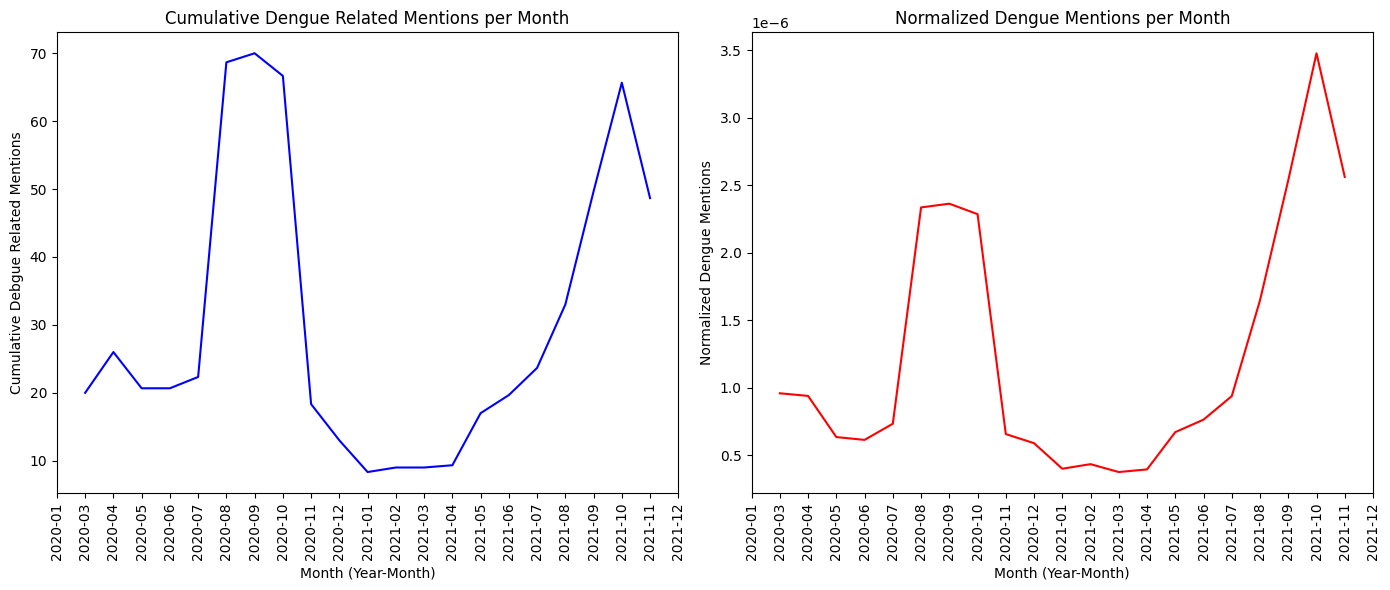

In [4]:
import pandas as pd

# Convert data to Pandas Series for smoothing
counts_series = pd.Series(counts)
normalized_series = pd.Series(normalized_mentions)

# Apply a rolling average with a window size for smoothing
window_size = 3  # Adjust as needed for smoother curves
smoothed_counts = counts_series.rolling(window=window_size, center=True).mean()
smoothed_normalized_mentions = normalized_series.rolling(window=window_size, center=True).mean()

# Plotting the monthly accumulated counts and normalized counts
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plot the smoothed cumulative raw counts by month (ax1)
ax1.plot(month_labels, smoothed_counts, color='b', linestyle='-')  # Removed marker
ax1.set_xticklabels(month_labels, rotation=90)
ax1.set_xlabel('Month (Year-Month)')
ax1.set_ylabel('Cumulative Debgue Related Mentions')
ax1.set_title('Cumulative Dengue Related Mentions per Month')

# Plot the smoothed normalized counts by month (ax2)
ax2.plot(month_labels, smoothed_normalized_mentions, color='r', linestyle='-')  # Removed marker
ax2.set_xticklabels(month_labels, rotation=90)
ax2.set_xlabel('Month (Year-Month)')
ax2.set_ylabel('Normalized Dengue Mentions')
ax2.set_title('Normalized Dengue Mentions per Month')

# Adjust layout and show plot
plt.tight_layout()
plt.show()


In [5]:
import json
import re
import os
import matplotlib.pyplot as plt
from datetime import datetime
from collections import defaultdict

hiv_aids_keywords = [
    "HIV", "AIDS", "human immunodeficiency virus", "acquired immuno","deficiency syndrome",
    "retrovirus",  "antiretroviral", "ART", "HAART",
    "CD4 count",   "PrEP", "PEP", "post-exposure prophylaxis", 
    "pre-exposure prophylaxis"]



pattern = re.compile(r'\b(' + '|'.join(hiv_aids_keywords) + r')\b', re.IGNORECASE)
covid_keywords = [
    "covid", "corona"
]

covidpattern = re.compile(r'\b(' + '|'.join(covid_keywords) + r')\b', re.IGNORECASE)



# Directory containing the JSON files
folder_path = "CS685_Data"

# Function to extract year and month from filename (assuming format 'twitter_stream_YYYY_MM_DD_filtered.json')
def extract_year_month_from_filename(filename):
    # Match the date part in the filename (e.g., '2020_01_01')
    date_match = re.match(r'twitter[_-]stream[_-](\d{4})[_-](\d{2})[_-](\d{2})[_-]filtered.json', filename)
    if date_match:
        year, month, _ = map(int, date_match.groups())
        return (year, month)
    return None

# Initialize dictionaries to accumulate data by month
monthly_counts = defaultdict(int)
monthly_mentions = defaultdict(int)
monthly_normalized = defaultdict(float)
monthly_files = defaultdict(list)

# Loop through all files in the folder and process them
for filename in sorted(os.listdir(folder_path)):
    if filename.endswith(".json"):
        year_month = extract_year_month_from_filename(filename)
        if year_month:
            year, month = year_month
            file_path = os.path.join(folder_path, filename)
            covid_mentions_count = 0
            total_tweets_count = 0

            # Open and read through the JSON file
            with open(file_path, "r") as file:
                for line in file:
                    try:
                        # Load each line as JSON
                        data = json.loads(line)

                        # Check for "output" and "ParseCount" field
                        if 'output' in data:
                            parse_count = data['output'].get('ParseCount', 0)
                            total_tweets_count += parse_count

                            # Check if there are any "Objects" to parse for tweet text
                            if 'Objects' in data['output']:
                                for obj in data['output']['Objects']:
                                    tweet_text = obj.get("text", "")
                                    
                                    # Check for the keywords in the tweet text
                                    if pattern.search(tweet_text):
                                        covid_mentions_count += 1
                                        # if(covidpattern.search(tweet_text)):
                                        #     covid_mentions_count -= 1

                    except json.JSONDecodeError:
                        # Handle any potential JSON decoding errors
                        print(f"Error decoding JSON in file {filename}")

            # Accumulate counts for each month
            monthly_counts[(year, month)] += total_tweets_count
            monthly_mentions[(year, month)] += covid_mentions_count
            monthly_files[(year, month)].append(filename)

# Calculate normalized mentions for each month
for month in monthly_mentions:
    total_mentions = monthly_mentions[month]
    total_tweets = monthly_counts[month]
    if total_tweets > 0:
        monthly_normalized[month] = total_mentions / total_tweets
    else:
        monthly_normalized[month] = 0
# Prepare data for plotting
months = sorted(monthly_counts.keys())
counts = [monthly_mentions[month] for month in months]
mentions = [monthly_mentions[month] for month in months]
normalized_mentions = [monthly_normalized[month] for month in months]
month_labels = [f"{year}-{month:02d}" for year, month in months]



C:\Users\20lid\AppData\Local\Temp\ipykernel_12292\1929397950.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(month_labels, rotation=90)
C:\Users\20lid\AppData\Local\Temp\ipykernel_12292\1929397950.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(month_labels, rotation=90)


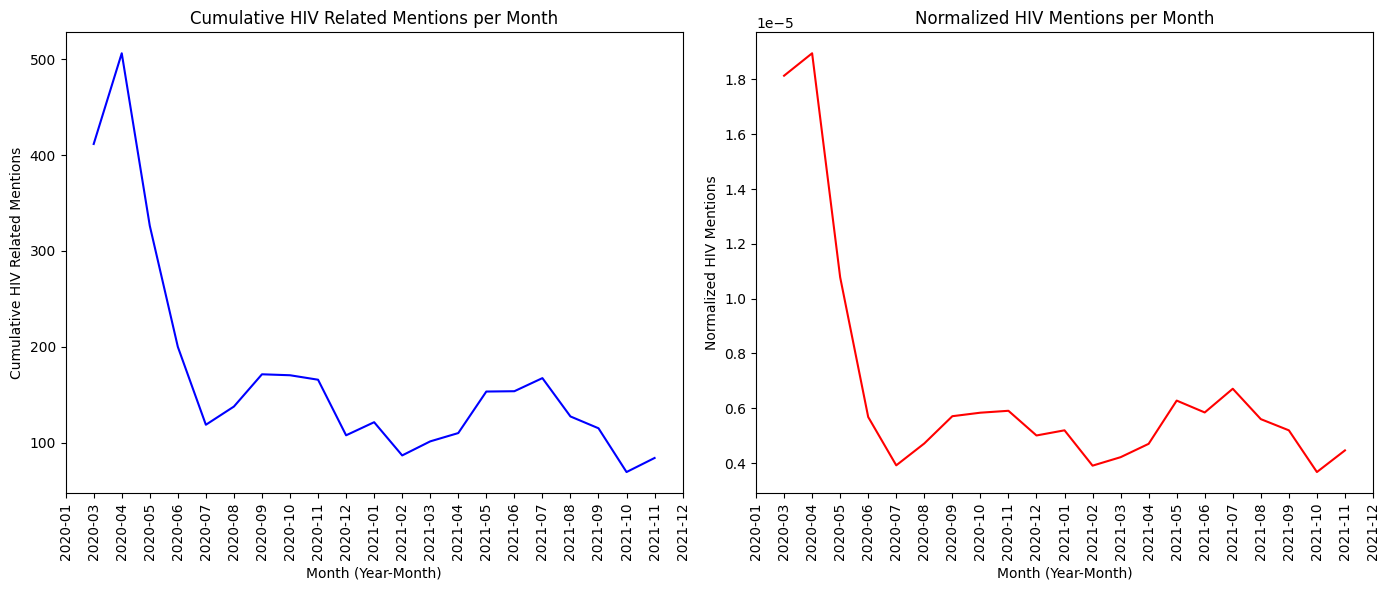

In [6]:
import pandas as pd

# Convert data to Pandas Series for smoothing
counts_series = pd.Series(counts)
normalized_series = pd.Series(normalized_mentions)

# Apply a rolling average with a window size for smoothing
window_size = 3  # Adjust as needed for smoother curves
smoothed_counts = counts_series.rolling(window=window_size, center=True).mean()
smoothed_normalized_mentions = normalized_series.rolling(window=window_size, center=True).mean()

# Plotting the monthly accumulated counts and normalized counts
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plot the smoothed cumulative raw counts by month (ax1)
ax1.plot(month_labels, smoothed_counts, color='b', linestyle='-')  # Removed marker
ax1.set_xticklabels(month_labels, rotation=90)
ax1.set_xlabel('Month (Year-Month)')
ax1.set_ylabel('Cumulative HIV Related Mentions')
ax1.set_title('Cumulative HIV Related Mentions per Month')

# Plot the smoothed normalized counts by month (ax2)
ax2.plot(month_labels, smoothed_normalized_mentions, color='r', linestyle='-')  # Removed marker
ax2.set_xticklabels(month_labels, rotation=90)
ax2.set_xlabel('Month (Year-Month)')
ax2.set_ylabel('Normalized HIV Mentions')
ax2.set_title('Normalized HIV Mentions per Month')

# Adjust layout and show plot
plt.tight_layout()
plt.show()
